In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D # 3d Graph
import matplotlib.pyplot  as plt
import seaborn as sns

# importar metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import statsmodels.formula.api as sfm   # pruebas estadisticas

# import metrics MRL
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
tabla=pd.read_csv(r"C:\Users\Usuario\Documents\Python Scripts\iris_dataset.csv",delimiter=",")
iris=pd.DataFrame(tabla)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.groupby('target').size()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [4]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

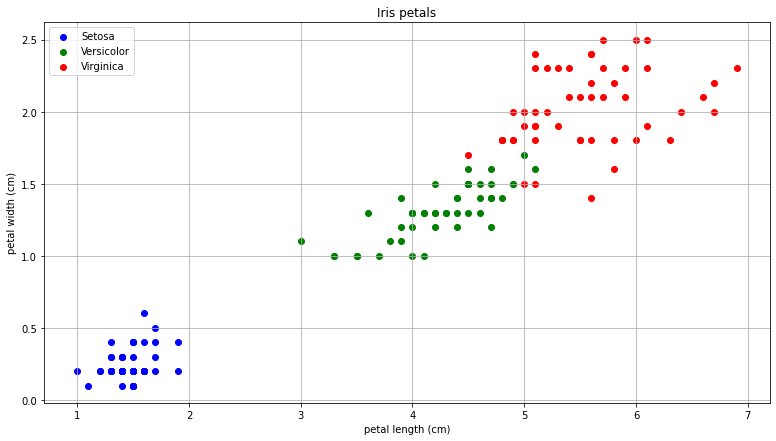

In [6]:
import matplotlib.pyplot as plt

setosa = iris[iris.target == "Iris-setosa"]
versicolor = iris[iris.target=='Iris-versicolor']
virginica = iris[iris.target=='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [7]:
# 2. Splitting data for training and testing
from sklearn.model_selection import train_test_split
x=pd.DataFrame(iris,columns=['petal length (cm)','petal width (cm)'])      # dataset.data
y=pd.DataFrame(iris,columns=['target']) # dataset.target 

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [8]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (120, 2)
y_train shape: (120, 1)
x_test shape: (30, 2)
y_test shape: (30, 1)


In [9]:
#3. Training the model. Classification models.
# model=DecisionTreeClassifier()
# model=RandomForestClassifier()
model=GaussianNB()
model.fit(x_train, y_train)

predictions=model.predict(x_test)
predictions=pd.DataFrame(predictions)
predictions=np.array(predictions,dtype=object)
predictions

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica']], dtype=object)

In [10]:
# Se crea un dataframe para comparar las predicciones con el valor real
#df_predicciones=pd.DataFrame({'poverty_index':y_test,'PRED':predictions})
df_predicciones=pd.DataFrame(predictions, y_test)
df_predicciones

,0
"(Iris-setosa,)",Iris-setosa
"(Iris-versicolor,)",Iris-versicolor
"(Iris-versicolor,)",Iris-versicolor
"(Iris-setosa,)",Iris-setosa
"(Iris-virginica,)",Iris-virginica
"(Iris-versicolor,)",Iris-versicolor
"(Iris-virginica,)",Iris-virginica
"(Iris-setosa,)",Iris-setosa
"(Iris-setosa,)",Iris-setosa
"(Iris-virginica,)",Iris-virginica


In [11]:
#5. Evaluate predictions
print("Accuracy on test set: ",round(accuracy_score(y_test, predictions),2))

Accuracy on test set:  0.97


In [12]:
 #Muestra matriz de confusion
# Crea MC
confusion_matrix=metrics.confusion_matrix(y_test, predictions)
confusion_matrix

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

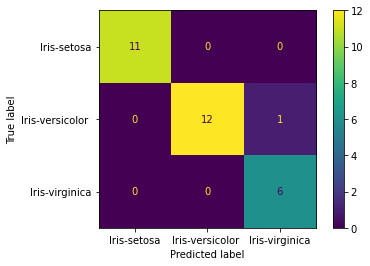

In [13]:

#Visauliza MC
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = ['Iris-setosa','Iris-versicolor ','Iris-virginica'])
cm_display.plot()
plt.show()

In [14]:
# Metricas de la clasificacion
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
######################################################################################################################
                                                 #####  MODELO DE REGRESION LINEAL SIMPLE ######
######################################################################################################################

# "...se quiere predecir el ancho del petalo 'petal width' en relacion al largo del petalo 'petal length'..."

#  Splitting data for training and testing
from sklearn.model_selection import train_test_split
x2=pd.DataFrame(iris,columns=['petal length (cm)'])      
y2=pd.DataFrame(iris,columns=['petal width (cm)']) 

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2, random_state=1)
x_test2


,petal length (cm)
14,1.2
98,3.0
75,4.4
16,1.3
131,6.4
56,4.7
141,5.1
44,1.9
29,1.6
120,5.7


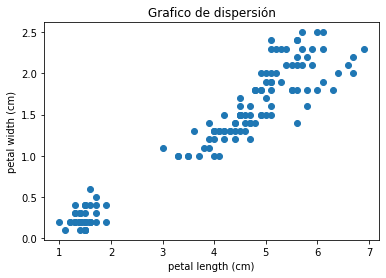

In [16]:
# Graficar la recta de regresion del modelo predictivo
plt.scatter(x2,y2)
# plt.plot(x2,y2,'r')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Grafico de dispersión')
plt.show()

In [17]:

print("x_train shape:",x_train2.shape)
print("y_train shape:",y_train2.shape)
print("x_test shape:",x_test2.shape)
print("y_test shape:",y_test2.shape)

x_train shape: (120, 1)
y_train shape: (120, 1)
x_test shape: (30, 1)
y_test shape: (30, 1)


In [18]:
# TRAINING THE MODEL. Regression models.
# model=DecisionTreeClassifier()
# model=RandomForestClassifier()
model2=LinearRegression()
model2=model2.fit(x_train2, y_train2)

predictions2=model2.predict(x_test2)
#predictions2=pd.DataFrame(predictions2)
predictions2=np.array(predictions2,dtype=float)
predictions2

array([[0.11467953],
       [0.87557714],
       [1.46738639],
       [0.15695162],
       [2.31282819],
       [1.59420266],
       [1.76329102],
       [0.41058415],
       [0.28376789],
       [2.01692356],
       [1.38284222],
       [0.32603998],
       [2.10146774],
       [1.50965848],
       [1.50965848],
       [0.15695162],
       [1.29829804],
       [1.50965848],
       [0.2414958 ],
       [0.11467953],
       [1.46738639],
       [1.50965848],
       [1.72101893],
       [0.15695162],
       [2.14373983],
       [1.34057013],
       [0.19922371],
       [0.2414958 ],
       [1.59420266],
       [1.72101893]])

In [19]:
# parametros del modelo de regresión lineal
model2.get_params() 

# copy_X: por default es TRUE para que copie el resultado.
# fit_intercept: por default es TRUE. Calcula el coef. para el modelo.
# n_jobs: por default NONE. Numero de funcionalidades para el proyecto.
# normalize: por default es "deprecated" , significa discontnuado o no disponible.
# positive: fuerza al coef. para que sea positivo.

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [20]:
# Obtenemos el coeficiente del modelo: la pendiente
a=model2.coef_
print("El valor del coeficiente es: ", a )

El valor del coeficiente es:  [[0.4227209]]


In [21]:
# la intercepcion con el eje y (orddenada al origen)
b=model2.intercept_
print("El valor del término independiente es:", b)

El valor del término independiente es: [-0.39258555]


In [22]:
print("La ecuación lineal es: y=", a,"* X","+",b)

La ecuación lineal es: y= [[0.4227209]] * X + [-0.39258555]


In [23]:
# por ejemplo sea x_test2: 1.2 el valor de la prediccion es
y_pred=0.422*(1.2)-0.3925
print(" La prediccion del ancho del petalo es:", round(y_pred,4))

 La prediccion del ancho del petalo es: 0.1139


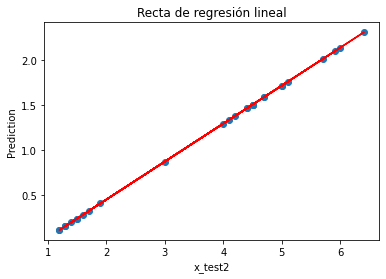

In [24]:
# Graficar la recta de regresion del modelo predictivo
plt.scatter(x_test2,predictions2)
plt.plot(x_test2,predictions2,'r')
plt.xlabel('x_test2')
plt.ylabel('Prediction')
plt.title('Recta de regresión lineal')
plt.show()

In [25]:
y_test2=np.array(y_test2,dtype=float)
y_test2


array([[0.2],
       [1.1],
       [1.4],
       [0.4],
       [2. ],
       [1.6],
       [2.3],
       [0.4],
       [0.2],
       [2.3],
       [1.3],
       [0.4],
       [2.1],
       [1.5],
       [1.5],
       [0.2],
       [1.2],
       [1.5],
       [0.4],
       [0.2],
       [1.2],
       [1.5],
       [1.7],
       [0.3],
       [1.8],
       [1.3],
       [0.2],
       [0.3],
       [1.2],
       [1.9]])

In [26]:
# Se crea un dataframe para comparar las predicciones con el valor real
#df_predicciones=pd.DataFrame({'poverty_index':y_test,'PRED':predictions})
pd.DataFrame({'Valor_Real':y_test2.flatten(), 'Valor_Pred':predictions2.flatten()})


,Valor_Real,Valor_Pred
0,0.2,0.114680
1,1.1,0.875577
2,1.4,1.467386
3,0.4,0.156952
4,2.0,2.312828
5,1.6,1.594203
6,2.3,1.763291
7,0.4,0.410584
8,0.2,0.283768
9,2.3,2.016924


In [27]:
# METRICAS. Evaluate predictions
yt2=y_test2.flatten()
pd2=predictions2.flatten()

mae=mean_absolute_error(yt2,pd2)  # var. rpta. del conjunto de testing y de la prediccion 
mse=mean_squared_error(yt2,pd2)
rmse=mse**(1/2.0)
# El Error absoluto promedio
print("The mean absolte error (MAE) on test set: {:.5f}".format(mae))  

# Error cuadrático promedio
print("The mean squared error (MSE) on test set: {:.4f}".format(mse)) 

# Raiz cuadrada del error cuadrático medio
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse)) # raiz cuadrada del error cuadratico medio

# R2 Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(yt2,pd2))


The mean absolte error (MAE) on test set: 0.12944
The mean squared error (MSE) on test set: 0.0351
The root mean squared error (RMSE) on test set: 0.1875
Variance score: 0.93


In [28]:
######################################################################################################################
                                                 #####  MODELO DE REGRESION LINEAL MULTIPLE  ######
######################################################################################################################

# "...se quiere predecir el ancho del petalo 'petal width' en relacion al largo del petalo y del sepalo 'petal length' y 'sepal length' ..."

#  Splitting data for training and testing
#import statsmodels.api as sm
from sklearn.model_selection import train_test_split
x3=pd.DataFrame(iris,columns=['petal length (cm)','sepal length (cm)'])      
y3=pd.DataFrame(iris,columns=['petal width (cm)']) 

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.2, random_state=1)

y_test3

,petal width (cm)
14,0.2
98,1.1
75,1.4
16,0.4
131,2.0
56,1.6
141,2.3
44,0.4
29,0.2
120,2.3


In [29]:
model3=LinearRegression() # genera modelo ML
model3=model3.fit(x_train3,y_train3) # entrana el modelo
pred3=model3.predict(x_test3) # genera prediccion
pred3=np.array(pred3,dtype=float)
pred3

array([[-0.02444254],
       [ 0.92901704],
       [ 1.39859732],
       [ 0.07657081],
       [ 2.18156269],
       [ 1.5818985 ],
       [ 1.69325689],
       [ 0.40326021],
       [ 0.31308926],
       [ 1.98003334],
       [ 1.43604835],
       [ 0.26775511],
       [ 2.04901686],
       [ 1.47300203],
       [ 1.5262193 ],
       [ 0.20961399],
       [ 1.31384756],
       [ 1.57943658],
       [ 0.17216296],
       [ 0.081992  ],
       [ 1.54494482],
       [ 1.60604521],
       [ 1.67206945],
       [ 0.12978808],
       [ 2.08350861],
       [ 1.37494796],
       [ 0.11106256],
       [ 0.21207591],
       [ 1.60850714],
       [ 1.72528673]])

In [30]:
# parametros del modelo de regresión lineal multiple
model3.get_params() 

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [31]:
# obtener coefcientes del modelo b1, b2
# [b1, b2]
mc=model3.coef_
mc

array([[ 0.47796075, -0.13304318]])

In [32]:
mc.shape
# 1 fila 2 columnas

(1, 2)

In [33]:
# leer fila1 columna 1 (b1)


# leer fila 1 columna 2 (b2)


In [34]:
# obtener el termino independiente del modelo b0
model3.intercept_

array([0.173655])

In [35]:
# Cantidad de feautures " fatores"
model3.n_features_in_

2

In [36]:
# Ecuacion del modelo MRLM. y=b1.x1+b2.x2+bo
print("la ecuacion del MRLM es: y=",0.47796075,'* x1',-0.13304318,'* x2 +',0.173655)

la ecuacion del MRLM es: y= 0.47796075 * x1 -0.13304318 * x2 + 0.173655


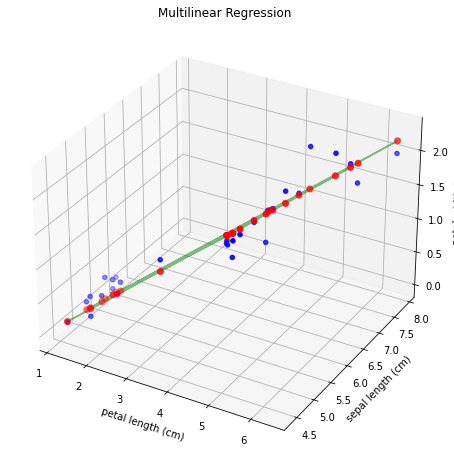

In [37]:
# Datos en array bidimensional
nx=x_test3[['petal length (cm)']]
ny=x_test3[['sepal length (cm)']]
nz=pred3

nx=np.array(nx,dtype=float)
ny=np.array(ny,dtype=float)
nz=np.array(nz,dtype=float)

fig=plt.figure()
fig.set_size_inches(8,8)

ax=fig.add_subplot(111,projection='3d')
# Graficamos en rojo los puntos del valor predicho
ax.scatter(nx,ny,nz, c='red',s=35)
# Graficamos en azul los puntos del Valor real 
ax.scatter(nx,ny,y_test3, c='blue',s=20)
# Graficamos el plano
ax.plot3D(nx,ny,nz,alpha=0.5,c='green')
# agregamos titulo y etiquetas
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('sepal length (cm)')
ax.set_zlabel('petal width (cm)')
ax.set_title('Multilinear Regression')
plt.show()

In [38]:
y_test3=np.array(y_test3,dtype=float)
y_test3

array([[0.2],
       [1.1],
       [1.4],
       [0.4],
       [2. ],
       [1.6],
       [2.3],
       [0.4],
       [0.2],
       [2.3],
       [1.3],
       [0.4],
       [2.1],
       [1.5],
       [1.5],
       [0.2],
       [1.2],
       [1.5],
       [0.4],
       [0.2],
       [1.2],
       [1.5],
       [1.7],
       [0.3],
       [1.8],
       [1.3],
       [0.2],
       [0.3],
       [1.2],
       [1.9]])

In [39]:
# Se crea un dataframe para comparar las predicciones con el valor real

pd.DataFrame({'Valor_Real':y_test3.flatten(),'Valor_Pred':pred3.flatten()})


,Valor_Real,Valor_Pred
0,0.2,-0.024443
1,1.1,0.929017
2,1.4,1.398597
3,0.4,0.076571
4,2.0,2.181563
5,1.6,1.581899
6,2.3,1.693257
7,0.4,0.403260
8,0.2,0.313089
9,2.3,1.980033


In [40]:
# METRICAS del MRLM. Evaluar la performance de la prediccion.
yt3=y_test3.flatten()
pd3=pred3.flatten()

mae=mean_absolute_error(yt3,pd3)  # var. rpta. del conjunto de testing y de la prediccion 
mse=mean_squared_error(yt3,pd3)
rmse=mse**(1/2.0)
# El Error absoluto promedio
print("The mean absolte error (MAE) on test set: {:.5f}".format(mae))  

# Error cuadrático promedio
print("The mean squared error (MSE) on test set: {:.4f}".format(mse)) 

# Raiz cuadrada del error cuadrático medio
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse)) # raiz cuadrada del error cuadratico medio

# R2 Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(yt3,pd3))


The mean absolte error (MAE) on test set: 0.15506
The mean squared error (MSE) on test set: 0.0428
The root mean squared error (RMSE) on test set: 0.2070
Variance score: 0.91


In [41]:
############################  ANALISIS MULTIVARIADO ################################################
# MATRIZ DE VARIANZA-COVARIANZA
# Es una matriz cuandrada, simetrica, que muestra el grado de asociacion entre las variables

matriz_cov=iris.cov()
matriz_cov

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14524\1503349795.py:5: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_cov=iris.cov()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.039268,1.273682,0.516904
sepal width (cm),-0.039268,0.188004,-0.321713,-0.117981
petal length (cm),1.273682,-0.321713,3.113179,1.296387
petal width (cm),0.516904,-0.117981,1.296387,0.582414


In [42]:
# MATRIZ DE CORRELACION
# matriz de covarianzas normalizadas. los valores próximos a 1 y -1 muestran correlacion fuerte y prox. a cero correlacion débil. 
# los valores (+) relación directa y (-) relación inversa.

matriz_correlacion=iris.corr()
matriz_correlacion


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14524\1434247355.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion=iris.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


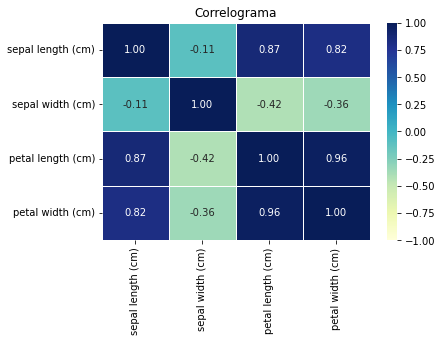

In [43]:
# Gráfico de la matriz de correlación mediante un correlograma
sns.heatmap(matriz_correlacion,annot=True,cmap='YlGnBu',vmin=-1,vmax=1,fmt=".2f",linewidth=.5)
plt.title("Correlograma")
plt.show()

In [44]:
# para visualizar diferentes paletas de colores cmap, visitar el sig. link
# https://edgarjayo.wordpress.com/2021/07/01/9-aprende-matplotlib-grafico-de-dispersion-parametros-cmap-norm-vmin-y-vmax/ 

In [45]:
# parámetros del heatmap
sns.heatmap


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [46]:
# para visualizar parametros del heatmap, visitar el sig. link
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [47]:
######################################### MODELO DE REGRESION POLINOMIAL ##################################################################
###########################################################################################################################################
# "...Encontrar la curva  que mejor  describa la relación entre las variables....."

In [48]:
#from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import PolynomialFeatures

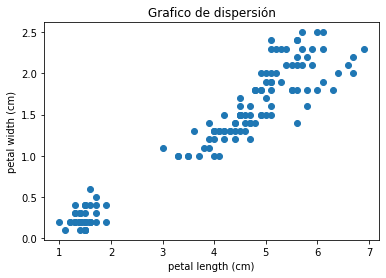

In [49]:
# Seleccionar las variables
x4=np.array(iris['petal length (cm)'] ,dtype=float)    
y4=np.array(iris['petal width (cm)'] ,dtype=float)

# Graficar la recta de regresion del modelo predictivo
plt.scatter(x4,y4)
#plt.plot(x4,y4,'r')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Grafico de dispersión')
plt.show()

In [50]:
#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train4,x_test4,y_train4,y_test4=train_test_split(x4,y4,test_size=0.2, random_state=1)
x_test4

array([1.2, 3. , 4.4, 1.3, 6.4, 4.7, 5.1, 1.9, 1.6, 5.7, 4.2, 1.7, 5.9,
       4.5, 4.5, 1.3, 4. , 4.5, 1.5, 1.2, 4.4, 4.5, 5. , 1.3, 6. , 4.1,
       1.4, 1.5, 4.7, 5. ])

In [90]:
# Transformar los datos a un polinómio de grado 3
####################################################
transformer=PolynomialFeatures(degree=3, include_bias=False)
x_poly=transformer.fit_transform(x_train4.reshape(-1,1))

In [91]:
# Crear un modelo de regresión lineal
model4=LinearRegression()

# Entrenar el modelo con datos transformados
model4.fit(x_poly,y_train4)

LinearRegression()

In [92]:
# Transformar los datos a un polinomio de grado 3
x_new_poly=transformer.fit_transform(x_test4.reshape(-1,1))

In [93]:
# ingrear datos para hacer predicciones
pred4=model4.predict(x_new_poly) 
pred4

array([0.22478921, 0.6961442 , 1.46977249, 0.22083687, 2.2068442 ,
       1.63211532, 1.83029211, 0.28446469, 0.23493841, 2.0666372 ,
       1.35752463, 0.24773414, 2.12382019, 1.52485792, 1.52485792,
       0.22083687, 1.24362272, 1.52485792, 0.22607876, 0.22478921,
       1.46977249, 1.52485792, 1.78320839, 0.22083687, 2.14760912,
       1.30069679, 0.22132248, 0.22607876, 1.63211532, 1.78320839])

In [94]:
x_fit=np.linspace(1,8,10)
x_fit_poly=transformer.transform(x_fit.reshape(-1,1))
y_fit=model4.predict(x_fit_poly)

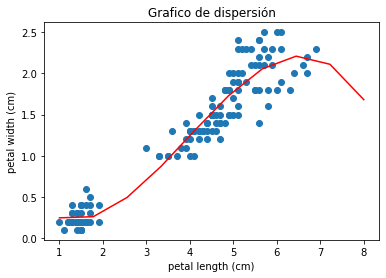

In [95]:
# Graficar el polinomio ajustado
plt.scatter(x4,y4)
plt.plot(x_fit,y_fit, label="Regrsion grd 3", color='red')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Grafico de dispersión')
plt.show()

In [96]:
model4.coef_
# [a1,a2,a3]

array([-0.73535118,  0.33063775, -0.02788201])

In [97]:
# model4.coef_.sns.summary()

In [98]:
# formula del polinomio de grado 3 y=a3.x^3+a2.x^2+a1.x+a0
#model4.coef_
a1=model4.coef_[0:1]
a2=model4.coef_[1:2]
a3=model4.coef_[2:3]
a3

array([-0.02788201])

In [99]:
a0=round(model4.intercept_,2)
a0

0.68

In [100]:
# Ecuacion polinomica.  formula del polinomio de grado 3 y=a3.x^3+a2.x^2+a1.x+a0
print("la ecuacion polinómica es y=",a3,"*x^3+",a2,"*x^2+",a1,"x",a0)


la ecuacion polinómica es y= [-0.02788201] *x^3+ [0.33063775] *x^2+ [-0.73535118] x 0.68


In [101]:
# Crear data frame entre VR y VP
# Se crea un dataframe para comparar las predicciones con el valor real

pd.DataFrame({'Valor_Real':y_test4.flatten(),'Valor_Pred':pred4.flatten()})

,Valor_Real,Valor_Pred
0,0.2,0.224789
1,1.1,0.696144
2,1.4,1.469772
3,0.4,0.220837
4,2.0,2.206844
5,1.6,1.632115
6,2.3,1.830292
7,0.4,0.284465
8,0.2,0.234938
9,2.3,2.066637


In [102]:
# Metricas del modelo
# METRICAS del MRLM. Evaluar la performance de la prediccion.
yt4=y_test4.flatten()
pd4=pred4.flatten()

MAE=mean_absolute_error(yt4,pd4)  # var. rpta. del conjunto de testing y de la prediccion 
MSE=mean_squared_error(yt4,pd4)
RMSE=MSE**(1/2.0)
# El Error absoluto promedio
print("The mean absolte error (MAE) on test set: {:.5f}".format(MAE))  

# Error cuadrático promedio
print("The mean squared error (MSE) on test set: {:.4f}".format(MSE)) 

# Raiz cuadrada del error cuadrático medio
print("The root mean squared error (RMSE) on test set: {:.4f}".format(RMSE)) # raiz cuadrada del error cuadratico medio

# R2 Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score R2: %.2f' % r2_score(yt4,pd4))

The mean absolte error (MAE) on test set: 0.12636
The mean squared error (MSE) on test set: 0.0337
The root mean squared error (RMSE) on test set: 0.1835
Variance score R2: 0.93
